In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, VerticalPitch
from statsbombpy import sb

In [2]:
df = sb.competitions()
df = df[df['competition_name'] == 'La Liga']
df.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
21,11,90,Spain,La Liga,male,False,False,2020/2021,2022-12-05T14:39:07.366723,2023-04-28T08:23:01.474542,2023-04-28T08:23:01.474542,2022-12-05T14:39:07.366723
22,11,42,Spain,La Liga,male,False,False,2019/2020,2023-04-19T10:52:22.240135,2021-06-13T16:17:31.694,None,2023-04-19T10:52:22.240135
23,11,4,Spain,La Liga,male,False,False,2018/2019,2023-04-25T00:14:09.884656,2021-07-09T14:53:22.103024,None,2023-04-25T00:14:09.884656
24,11,1,Spain,La Liga,male,False,False,2017/2018,2023-04-25T00:10:26.116531,2021-06-13T16:17:31.694,None,2023-04-25T00:10:26.116531
25,11,2,Spain,La Liga,male,False,False,2016/2017,2022-11-30T18:35:52.394297,2021-06-13T16:17:31.694,None,2022-11-30T18:35:52.394297


In [3]:
sb.matches(competition_id=11, season_id=90).tail(10)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
25,3764661,2021-01-06,21:00:00.000,Spain - La Liga,2020/2021,Athletic Club,Barcelona,2,3,available,...,2022-08-04T12:00,2,Regular Season,San Mamés Barria,Carlos del Cerro Grande,Marcelino García Toral,Ronald Koeman,1.1.0,2,2
26,3773526,2021-02-13,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Deportivo Alavés,5,1,available,...,2022-08-04T12:00,23,Regular Season,Spotify Camp Nou,Jorge Figueroa Vázquez,Ronald Koeman,Abelardo Fernández Antuña,1.1.0,2,2
27,3773474,2021-04-05,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Real Valladolid,1,0,available,...,2022-08-04T12:00,29,Regular Season,Spotify Camp Nou,Santiago Jaime Latre,Ronald Koeman,Sergio González Soriano,1.1.0,2,2
28,3773625,2021-02-27,16:15:00.000,Spain - La Liga,2020/2021,Sevilla,Barcelona,0,2,available,...,2022-08-04T12:00,25,Regular Season,Estadio Ramón Sánchez Pizjuán,Alejandro José Hernández Hernández,Julen Lopetegui Argote,Ronald Koeman,1.1.0,2,2
29,3773403,2021-01-31,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Athletic Club,2,1,available,...,2023-04-28T08:16:45.884638,21,Regular Season,Spotify Camp Nou,Antonio Miguel Mateu Lahoz,Ronald Koeman,Marcelino García Toral,1.1.0,2,2
30,3773547,2020-11-29,14:00:00.000,Spain - La Liga,2020/2021,Barcelona,Osasuna,4,0,available,...,2022-08-04T12:00,11,Regular Season,Spotify Camp Nou,Antonio Miguel Mateu Lahoz,Ronald Koeman,Jagoba Arrasate Elustondo,1.1.0,2,2
31,3773415,2021-02-21,14:00:00.000,Spain - La Liga,2020/2021,Barcelona,Cádiz,1,1,available,...,2022-08-04T12:00,24,Regular Season,Spotify Camp Nou,Juan Martínez Munuera,Ronald Koeman,Álvaro Cervera Díaz,1.1.0,2,2
32,3764440,2021-02-24,19:00:00.000,Spain - La Liga,2020/2021,Barcelona,Elche,3,0,available,...,2022-08-04T12:00,1,Regular Season,Spotify Camp Nou,Isidro Díaz de Mera Escuderos,Ronald Koeman,Francisco Escriba Segura,1.1.0,2,2
33,3773689,2021-04-25,16:15:00.000,Spain - La Liga,2020/2021,Villarreal,Barcelona,1,2,available,...,2023-04-28T00:44:33.357677,32,Regular Season,Estadio de la Cerámica,Carlos del Cerro Grande,Unai Emery Etxegoien,Ronald Koeman,1.1.0,2,2
34,3773477,2020-11-07,16:15:00.000,Spain - La Liga,2020/2021,Barcelona,Real Betis,5,2,available,...,2022-08-04T12:00,9,Regular Season,Spotify Camp Nou,NaN,Ronald Koeman,Manuel Luis Pellegrini Ripamonti,1.1.0,2,2


In [2]:
match = sb.events(match_id=3773477)
shots = match[match['type'].isin(['Shot'])]
shots[['position_x', 'position_y']] = pd.DataFrame(shots.location.tolist(), index= shots.index)
team1,team2 = shots['team'].unique()

/tmp/ipykernel_597/3566094918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots[['position_x', 'position_y']] = pd.DataFrame(shots.location.tolist(), index= shots.index)
/tmp/ipykernel_597/3566094918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots[['position_x', 'position_y']] = pd.DataFrame(shots.location.tolist(), index= shots.index)


In [17]:
def plot_shot_2teams(df):
    pitch = Pitch(pitch_type='statsbomb',line_color='grey',pitch_color='#1b1b1b')
    fig, ax = pitch.draw(figsize=(10, 6))
    team1,team2 = df['team'].unique()
    for i,shot in df.iterrows():
        x = shot['position_x']
        y = shot['position_y']
        goal = shot['shot_outcome'] == 'Goal'
        team_name = shot['team']
        marker_size_xg = shot['shot_statsbomb_xg']
        marker_size = 2
        if (team_name == team1):
            if goal:
                shot_circle = plt.Circle((x,y), marker_size, color='#f99f84')
                plt.text(x+1, y-2, shot['player'].split(' ')[-1], fontsize=8, color='white')
            else:
                shot_circle = plt.Circle((x,y), marker_size, color='#f99f84')
                shot_circle.set_alpha(.5)
            xg_circle = plt.Circle((x,y), marker_size_xg, color='white')
        elif (team_name == team2):
            if goal:
                shot_circle = plt.Circle((120-x,80-y), marker_size, color='#84def9')
                plt.text(120-x+1, 80-y-2, shot['player'].split(' ')[-1], fontsize=8, color='white')
            else:
                shot_circle = plt.Circle((120-x,80-y), marker_size, color='#84def9')
                shot_circle.set_alpha(.5)
            xg_circle = plt.Circle((120-x,80-y), marker_size_xg, color='white')
        ax.add_patch(shot_circle)
        # ax.add_patch(xg_circle)

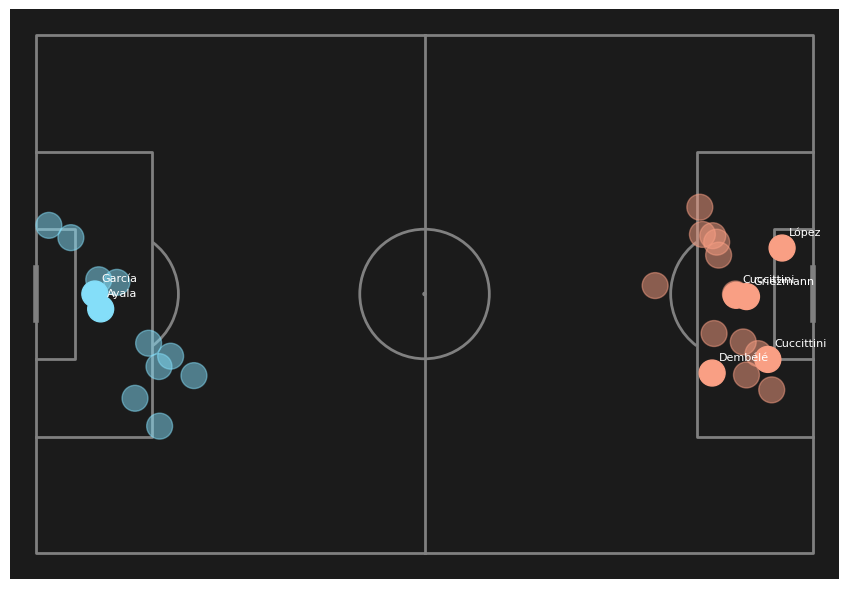

In [18]:
plot_shot_2teams(shots)

In [29]:
# match.pass_type.unique()
match['pass_outcome'].unique()

array([nan, 'Incomplete', 'Out', 'Unknown', 'Pass Offside'], dtype=object)

In [22]:
df_pass = match[(match['type'].isin(['Pass']))&(match['pass_type'].isin([np.nan,'Goal Kick']))
                # &(match['player']=='Sergio Busquets i Burgos')]
                &(match['team']=='Real Betis')]
df_pass[['position_x', 'position_y']] = pd.DataFrame(df_pass.location.tolist(), index= df_pass.index)
df_pass[['end_pass_x', 'end_pass_y']] = pd.DataFrame(df_pass.pass_end_location.tolist(), index= df_pass.index)
df_pass.head()

/tmp/ipykernel_621/2383136160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass[['position_x', 'position_y']] = pd.DataFrame(df_pass.location.tolist(), index= df_pass.index)
/tmp/ipykernel_621/2383136160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass[['position_x', 'position_y']] = pd.DataFrame(df_pass.location.tolist(), index= df_pass.index)
/tmp/ipykernel_621/2383136160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,tactics,team,team_id,timestamp,type,under_pressure,position_x,position_y,end_pass_x,end_pass_y
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Real Betis,218,00:00:03.101,Pass,NaN,63.7,45.1,79.1,75.9
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Real Betis,218,00:00:28.540,Pass,NaN,76.1,72.3,80.4,65.2
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Real Betis,218,00:00:29.264,Pass,NaN,79.8,64.7,75.5,60.6
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Real Betis,218,00:00:30.346,Pass,NaN,74.9,60.6,55.0,40.4
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Real Betis,218,00:00:35.280,Pass,NaN,55.8,45.6,56.3,71.3


In [3]:
def plot_passes_arrow(df,team=' ',player=' '):

  if team==' ' and player==' ':
    raise ValueError('Please enter either team or player name')
  elif team!=' ' and player!=' ':
    raise ValueError('Please enter only team or player name')

  pitch = Pitch(pitch_type='statsbomb',line_color='grey',pitch_color='#1b1b1b')
  fig, ax = pitch.draw(figsize=(10, 6))

  df_pass = df[(df['type'].isin(['Pass']))&(df['pass_type'].isin([np.nan,'Goal Kick']))].copy()
  df_pass[['position_x', 'position_y']] = pd.DataFrame(df_pass.location.tolist(), index= df_pass.index)
  df_pass[['end_pass_x', 'end_pass_y']] = pd.DataFrame(df_pass.pass_end_location.tolist(), index= df_pass.index)

  if team!=' ':
    df_pass = df_pass[df_pass['team']==team]
  elif player!=' ':
    df_pass = df_pass[df_pass['player']==player]
  else:
    raise ValueError('Please follow the instructions')
  
  df_pass_completed=df_pass[df_pass.pass_outcome.isna()]
  df_pass_other=df_pass[~df_pass.pass_outcome.isna()]

  pitch.arrows(df_pass_completed.position_x, df_pass_completed.position_y,
                df_pass_completed.end_pass_x, df_pass_completed.end_pass_y,
                  ax=ax, color='green', width=2, headwidth=4, headlength=4)
  pitch.arrows(df_pass_other.position_x, df_pass_other.position_y,
                df_pass_other.end_pass_x, df_pass_other.end_pass_y,
                  ax=ax, color='red', width=2, headwidth=4, headlength=4)
  pitch.scatter(df_pass.position_x, df_pass.position_y,
                alpha=0.2,s=100,color='white',ax=ax)

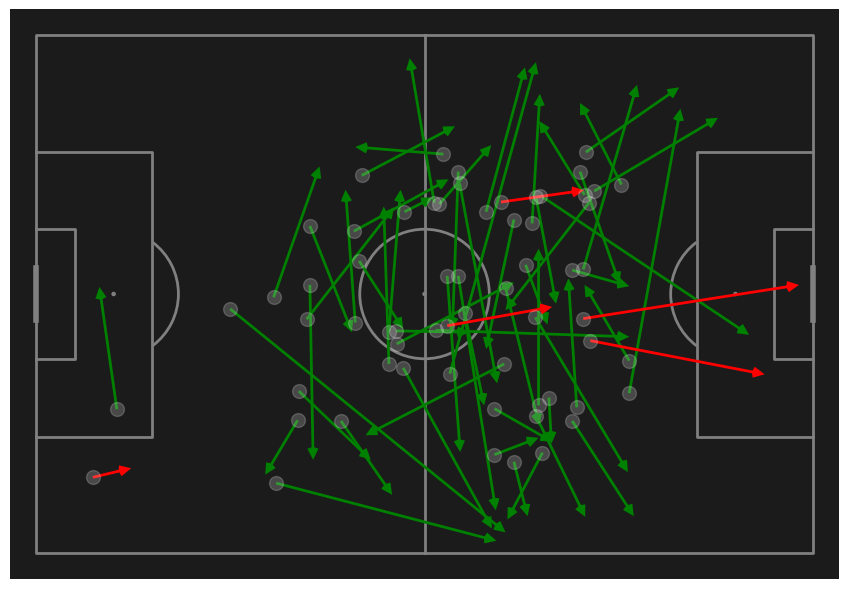

In [4]:
plot_passes_arrow(match,player='Sergio Busquets i Burgos')

In [53]:
# first iteration of code remove observations after first substitution
# second iteration should plot the players subbed on with new color/alpha
team_chosen = 'Barcelona'
sub = match[match['type'].isin(['Substitution'])].loc[match['team']==team_chosen].iloc[0]['index']
df_passnet = match[(match['type'].isin(['Pass']))&(match['pass_type'].isin([np.nan,'Goal Kick']))
                &(match['team']==team_chosen)&(match['pass_outcome'].isin([np.nan]))
                &(match['index']<sub)]
df_passnet[['position_x', 'position_y']] = pd.DataFrame(df_passnet.location.tolist(), index= df_passnet.index)
df_passnet[['end_pass_x', 'end_pass_y']] = pd.DataFrame(df_passnet.pass_end_location.tolist(), index= df_passnet.index)
df_passnet.head()

/tmp/ipykernel_597/706094780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passnet[['position_x', 'position_y']] = pd.DataFrame(df_passnet.location.tolist(), index= df_passnet.index)
/tmp/ipykernel_597/706094780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passnet[['position_x', 'position_y']] = pd.DataFrame(df_passnet.location.tolist(), index= df_passnet.index)
/tmp/ipykernel_597/706094780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,tactics,team,team_id,timestamp,type,under_pressure,position_x,position_y,end_pass_x,end_pass_y
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Barcelona,217,00:00:12.190,Pass,NaN,11.5,37.3,20.2,19.3
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Barcelona,217,00:00:18.670,Pass,NaN,31.5,19.3,22.7,41.1
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Barcelona,217,00:00:21.094,Pass,NaN,22.8,40.3,28.4,18.4
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Barcelona,217,00:00:24.361,Pass,NaN,35.2,16.8,55.5,15.7
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Barcelona,217,00:01:09.356,Pass,NaN,15.3,36.3,23.5,16.3


In [54]:
df_passnet['pass_recipient'].unique()

array(['Clément Lenglet', 'Gerard Piqué Bernabéu', 'Pedro González López',
       'Frenkie de Jong', 'Jordi Alba Ramos', 'Sergi Roberto Carnicer',
       'Ousmane Dembélé', 'Antoine Griezmann', 'Sergio Busquets i Burgos',
       'Marc-André ter Stegen', 'Anssumane Fati'], dtype=object)

In [55]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_passnet["player"].unique()):
    passx = df_passnet.loc[df_passnet["player"] == name]["position_x"].to_numpy()
    recx = df_passnet.loc[df_passnet["pass_recipient"] == name]["end_pass_x"].to_numpy()
    passy = df_passnet.loc[df_passnet["player"] == name]["position_y"].to_numpy()
    recy = df_passnet.loc[df_passnet["pass_recipient"] == name]["end_pass_y"].to_numpy()
    scatter_df.at[i, "player"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_passnet.loc[df_passnet["player"] == name]['type'].count()

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max()*1500)

#counting passes between players
df_passnet["pair_key"] = df_passnet.apply(lambda x: "_".join(sorted([x["player"], x["pass_recipient"]])), axis=1)
lines_df = df_passnet.groupby(["pair_key"]).position_x.count().reset_index()
lines_df.rename({'position_x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

/tmp/ipykernel_597/2826214762.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passnet["pair_key"] = df_passnet.apply(lambda x: "_".join(sorted([x["player"], x["pass_recipient"]])), axis=1)


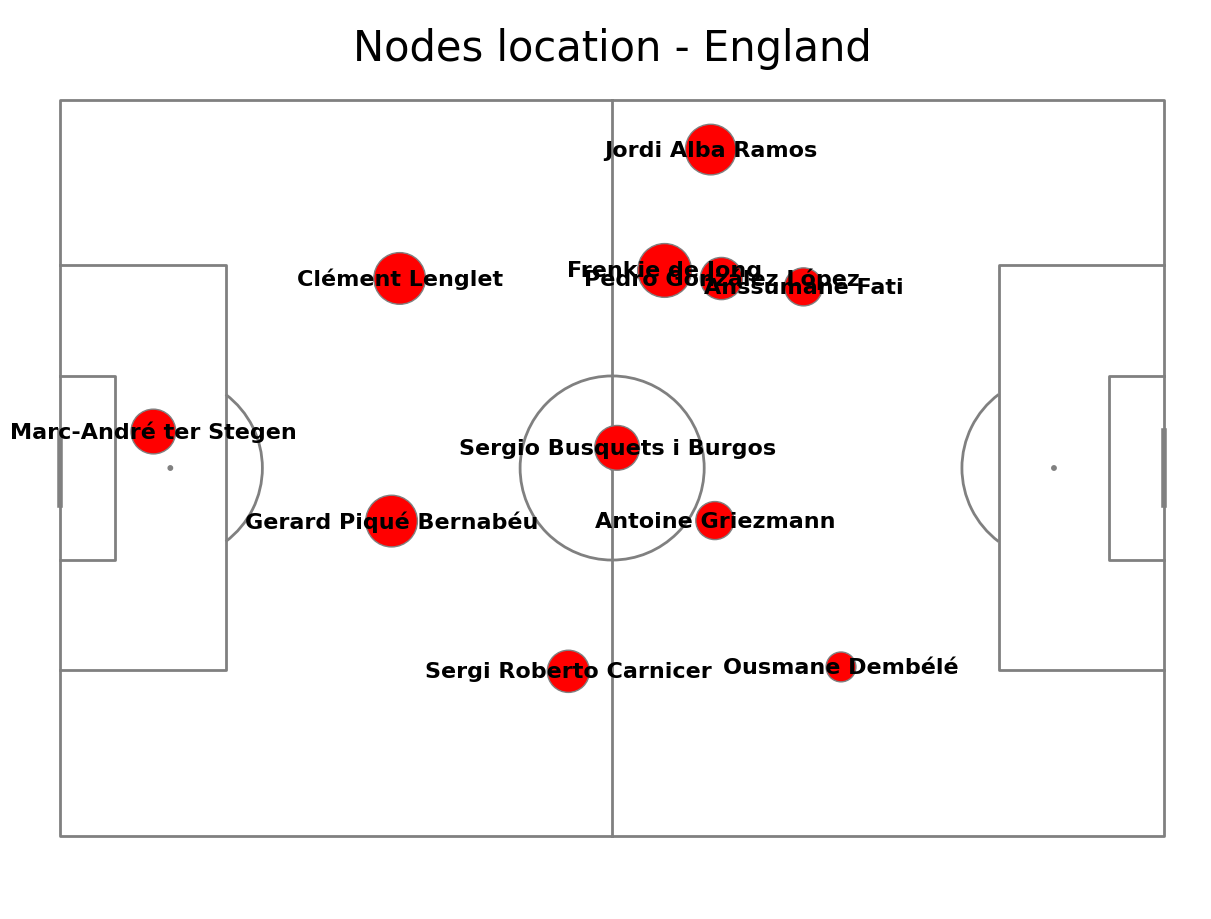

In [56]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - England", fontsize = 30)
plt.show()

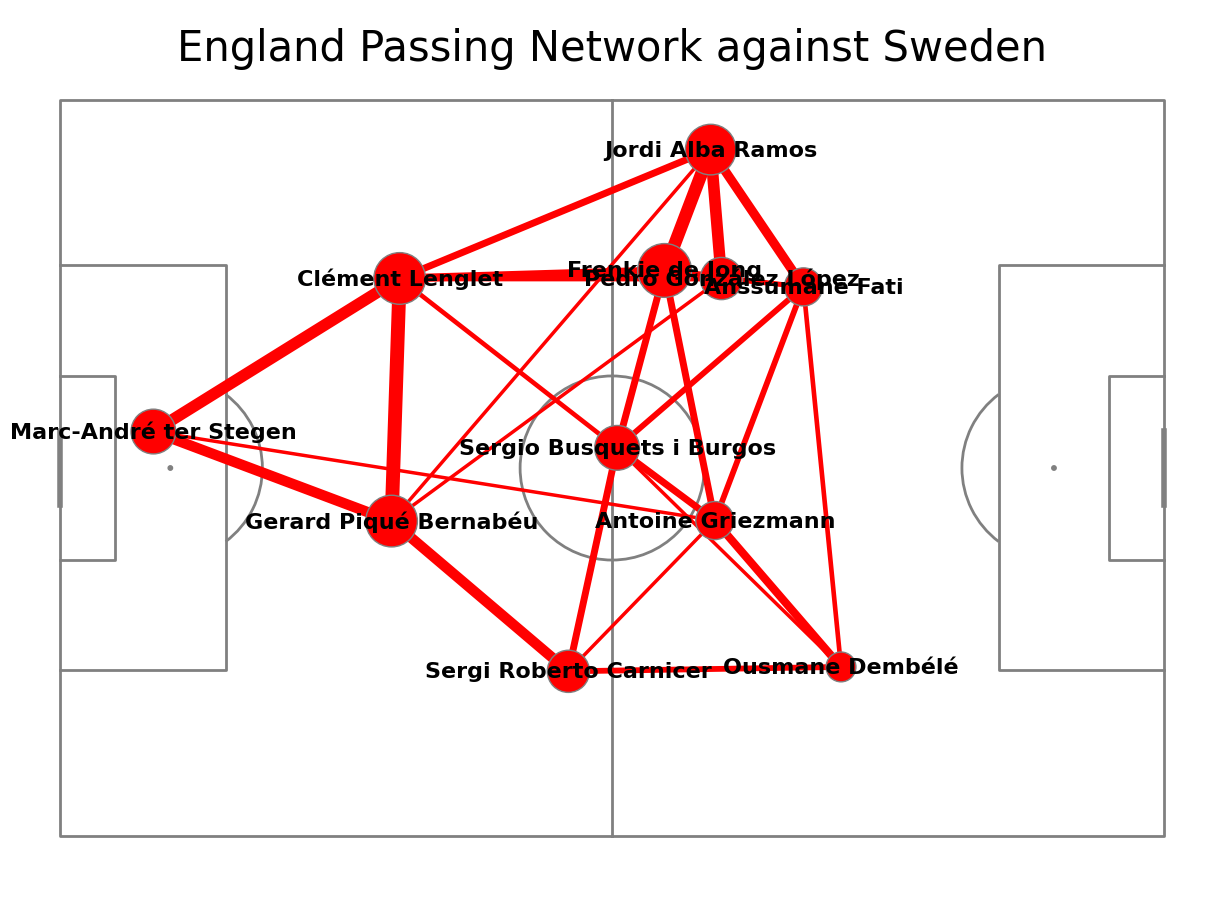

In [57]:
#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("England Passing Network against Sweden", fontsize = 30)
plt.show()

In [58]:
## OPTIONAL

#calculate number of successful passes by player
no_passes = df_passnet.groupby(['player']).position_x.count().reset_index()
no_passes.rename({'position_x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.043718592964824124
